In [71]:
# Data processing
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Data
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore') 


In [72]:
dataset = load_iris(as_frame=True)

In [73]:
# Convert dataset to a Pandas dataframe
dataset = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                       columns= dataset['feature_names'] + ['target'])

In [74]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [75]:
# Labels
targets = dataset["target"]
labels = targets.values
# Xs
dataset = dataset.drop(columns=["target", "petal length (cm)", "petal width (cm)"])
X = dataset.values
Xs = X
Xs

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [44]:
def plot_cluster(Xs: np.ndarray, labels: np.ndarray, centroids: np.ndarray, clusters: np.ndarray):
    """ Plot the data with the true labels alongside the centroids and the
    predicted cluster.
    If the elements from the dataset are not 2 or 3 dimensional then print
    the index, predicted cluster and true label.

    Args:
        Xs (numpy array): dataset
        labels (numpy array): real/true labels
        centroids (numpy array): positions for the centroids
        clusters (numpy array): predicted labels
    """

    labelsNo = np.max(labels)
    K = centroids.shape[0]

    markers = []

    while len(markers) < labelsNo:
        markers.extend(list(matplotlib.markers.MarkerStyle.filled_markers))

    colors = plt.cm.rainbow(np.linspace(0, 1, K+1))
    
    # 2D case 
    if Xs.shape[1] == 2:
        x = Xs[:,0]
        y = Xs[:,1]
        for (_x, _y, _c, _l) in zip(x, y, clusters, labels):
            plt.scatter(_x, _y, s=500, c=[colors[_c]], marker=markers[_l])
        plt.scatter(centroids[:,0], centroids[:, 1],
                    s=800, c=[colors[K]], marker=markers[labelsNo])
        plt.show()

    elif Xs.shape[1] == 3:
        x = Xs[:,0]
        y = Xs[:,1]
        z = Xs[:,2]
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        for (_x, _y, _z, _c, _l) in zip(x, y, z, clusters, labels):
            ax.scatter(_x, _y, _z, s=200, c=[colors[_c]], marker=markers[_l])
        ax.scatter(centroids[:,0], centroids[:, 1], centroids[:, 2],
                    s=400, c=[colors[K]], marker=markers[labelsNo])
        plt.show()
    else:
        for i in range(Xs.shape[0]):
            print(f"{i} : {clusters[i]} ~ {labels[i]}")

### K-Means

In [45]:
def closest_centroid(points, centroids):
    """
        returns an array containing the index to the nearest centroid for each point
    """
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """
        returns the new centroids assigned from the points closest to them
    """
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

def initialize_centroids(points, k):
    """
        returns k centroids from the initial points
    """
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

from numpy import linalg as LA

def l2_norm(p1, p2):
    return LA.norm((p1, p2), ord=2)

In [46]:
def kMeans(K, Xs):
    (N, D) = Xs.shape
 
    centroids = np.zeros((K, D))
    clusters = np.zeros(N).astype("uint")
    
    # Init centroids
    centroids = initialize_centroids(Xs, K)
    moving_tolerance = 1e-2
    _J = None
    current_iteration = 0
    
    while True:
        current_iteration += 1
        print('Cuurent iteration: {}'.format(current_iteration))
    
        clusters = np.zeros(N).astype("uint")
        clusters = closest_centroid(Xs, centroids)
    
        J = 0.0
        for i in range(N):
            for k in range(K):
                if clusters[i] == k:
                    J += l2_norm(Xs[i], centroids[k])
        if _J is not None and abs(J - _J) < moving_tolerance:
            break
        else:
            _J = J
            centroids = move_centroids(Xs, clusters, centroids)
        
    # TODO: Cerința 1
    print('Solved in {}'.format(current_iteration))
    return clusters, centroids

### Test the algo

In [61]:
clusters, centroids = kMeans(
    K = 2,
    Xs = Xs
)

Cuurent iteration: 1
Cuurent iteration: 2
Cuurent iteration: 3
Cuurent iteration: 4
Cuurent iteration: 5
Cuurent iteration: 6
Cuurent iteration: 7
Cuurent iteration: 8
Cuurent iteration: 9
Cuurent iteration: 10
Solved in 10


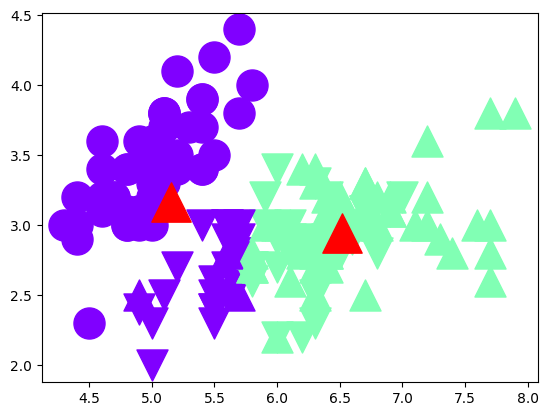

In [62]:
plot_cluster(
    labels=labels.astype("int"),
    Xs=Xs,
    clusters=clusters,
    centroids=centroids
)

### Compute the scores of the algorithm

In [ ]:
def randIndex(clusters, labels):
    
    # TODO: Cerința 2

    TP = 0
    FP = 0
    FN = 0
    TN = 0

    N = len(labels)
    for i in range(N):
        for j in range(N):
            if clusters[i] == clusters[j]:
                if labels[i] == labels[j]:
                    TP += 1
                else:
                    FP += 1
            else:
                if labels[i] == labels[j]:
                    FN += 1
                else:
                    TN += 1
    return float(TP + TN) / float(TP + FP + FN + TN)

print("randIndex:", randIndex(clusters, labels))